In [142]:
#import packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [106]:
train_df = pd.read_csv("C:/Users/yutin/Desktop/Python_DS/kaggle/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("C:/Users/yutin/Desktop/Python_DS/kaggle/house-prices-advanced-regression-techniques/test.csv")

In [107]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [108]:
#Saving Ids
train_ID = train_df['Id']
test_ID = test_df['Id']

#Dropping Ids
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

# Visualization & Normalization

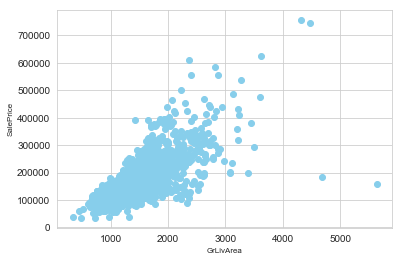

In [109]:
#visualization
fig, ax = plt.subplots() #ax is a figure
ax.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'], c = "skyblue")
plt.ylabel('SalePrice', fontsize=8)
plt.xlabel('GrLivArea', fontsize=8)
plt.show()


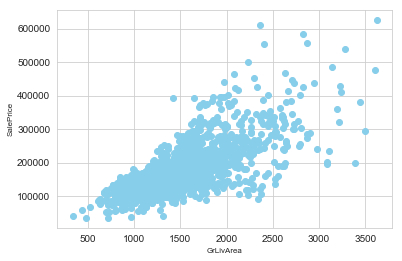

In [110]:
#elminate the outilers
#drop the index
train_df.drop(train_df[(train_df['GrLivArea']>4000)&(train_df['GrLivArea']<30000)].index,inplace=True)
fig, ax = plt.subplots()
ax.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'], c = "skyblue")
plt.ylabel('SalePrice', fontsize=8)
plt.xlabel('GrLivArea', fontsize=8)
plt.show()

In [111]:
#describe()
train_df['SalePrice'].describe()

count      1456.000000
mean     180151.233516
std       76696.592530
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      625000.000000
Name: SalePrice, dtype: float64

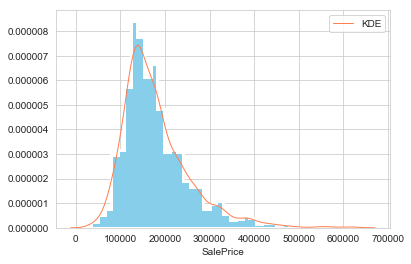

In [112]:
#distribution plot
#sns.displot();
sns.distplot(train_df['SalePrice'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "skyblue"});

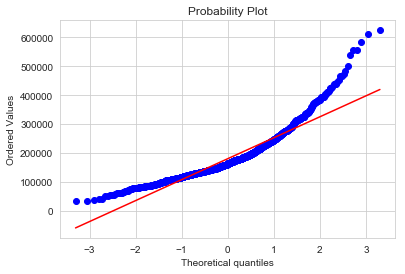

In [113]:
#QQplot
#normally distribution?
#stats.probplot(object, dist, plot)
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], dist = "norm", plot = plt)
plt.show()

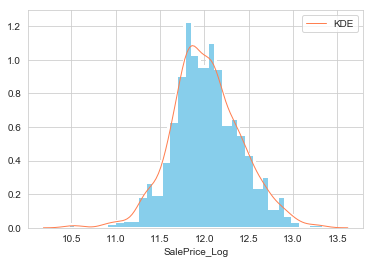

In [114]:
#not a normally distributed dataset
#modification
#log,exp,power

#log
train_df['SalePrice_Log'] = np.log(train_df['SalePrice'])

#arguments fixed
#just copy
sns.distplot(train_df['SalePrice_Log'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "skyblue"});

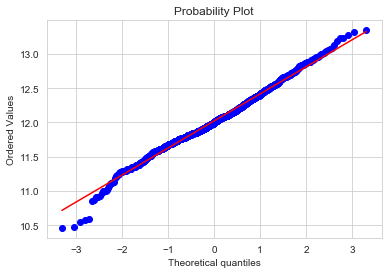

Skewness: 0.065449
Kurtosis: 0.666438


In [115]:
#recheck the normalization
fig = plt.figure
res = stats.probplot(train_df['SalePrice_Log'], dist = "norm", plot = plt)
plt.show()

#skewness and kurtosis
print("Skewness: %f" % train_df['SalePrice_Log'].skew())
print("Kurtosis: %f" % train_df['SalePrice_Log'].kurt())

Skewness: 6.060076
Kurtosis: 56.822460


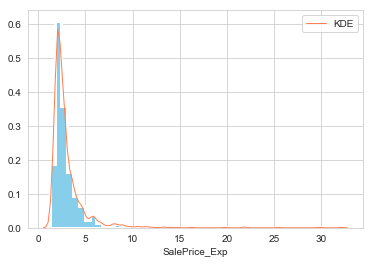

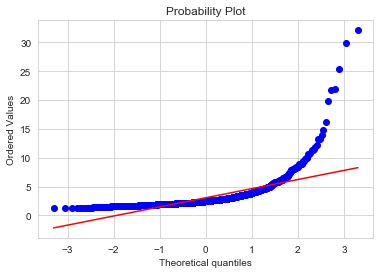

In [116]:
#exp transformation
train_df['SalePrice_Exp'] = np.exp(train_df['SalePrice']/train_df['SalePrice'].mean())

sns.distplot(train_df['SalePrice_Exp'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "skyblue"});

# 偏度与峰值(skewness and kurtosis)
print("Skewness: %f" % train_df['SalePrice_Exp'].skew())
print("Kurtosis: %f" % train_df['SalePrice_Exp'].kurt())

fig = plt.figure()
res = stats.probplot(train_df['SalePrice_Exp'], plot=plt)
plt.show()

Skewness: 0.810797
Kurtosis: 1.245798


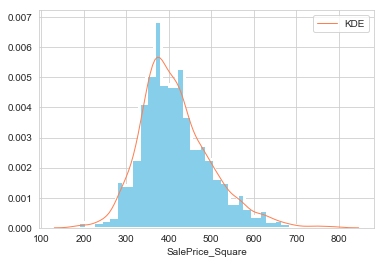

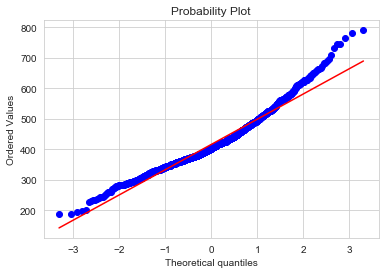

In [117]:
#power
train_df['SalePrice_Square'] = train_df['SalePrice']**0.5

sns.distplot(train_df['SalePrice_Square'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "skyblue"});

# 偏度与峰值(skewness and kurtosis)
print("Skewness: %f" % train_df['SalePrice_Square'].skew())
print("Kurtosis: %f" % train_df['SalePrice_Square'].kurt())

fig = plt.figure()
res = stats.probplot(train_df['SalePrice_Square'], plot=plt)
plt.show()

Skewness: 0.065460
Kurtosis: 0.666423


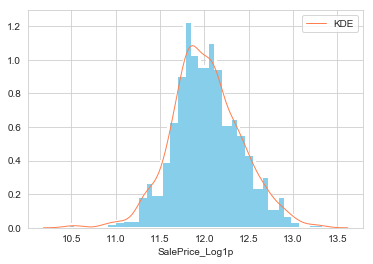

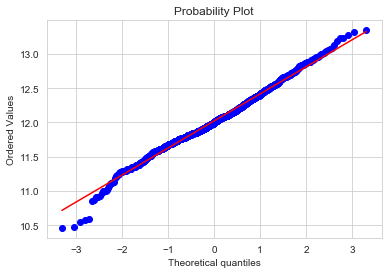

In [118]:
#choose log transformation
#but add some modification to ensure the effectiveness
#x = log(1+x), log1p
train_df['SalePrice_Log1p'] = np.log1p(train_df['SalePrice'])

sns.distplot(train_df['SalePrice_Log1p'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "skyblue"});

# 偏度与峰值(skewness and kurtosis)
print("Skewness: %f" % train_df['SalePrice_Log1p'].skew())
print("Kurtosis: %f" % train_df['SalePrice_Log1p'].kurt())

fig = plt.figure()
res = stats.probplot(train_df['SalePrice_Log1p'], plot=plt)
plt.show()


In [119]:
del train_df['SalePrice_Square']
del train_df["SalePrice_Exp"]
del train_df['SalePrice_Log']
del train_df["SalePrice"]

# Feature Analysis


In [143]:
#it is quite common to combine the train and test datasets for feature analysis
size_train_df = train_df.shape[0]
size_test_df = test_df.shape[0]

#save the target
target_variable = train_df['SalePrice_Log1p'].values

#combine
#pd.concat(,sort).reset_index()
#drop the target
data = pd.concat((train_df, test_df),sort=False).reset_index(drop=True)
data.drop(['SalePrice_Log1p'], axis=1, inplace=True)

NameError: name 'Text' is not defined

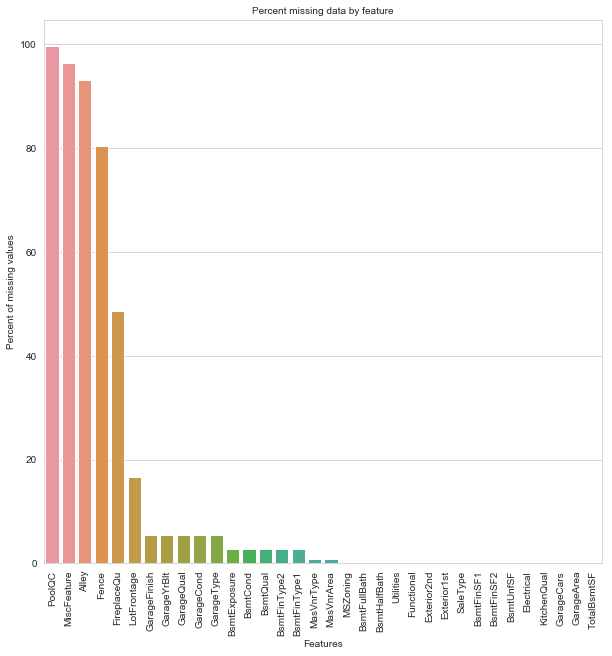

In [121]:
#missing data
#create a new feature data_missing
#fill with mean, median, mode
#use model to predict

#get the percentage of missing data * 100
#sum() instead of count()
#true = 1, false = 0
data_na = (data.isnull().sum() / len(data)) * 100
#drop, reset_index
data_na.drop(data_na[data_na==0].index,inplace=True)
data_na = data_na.sort_values(ascending=False)

#visualization
f, ax = plt.subplots(figsize=(10, 10))
plt.xticks(rotation='90')
sns.barplot(x=data_na.index, y=data_na)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Percent of missing values', fontsize=10)
plt.title('Percent missing data by feature', fontsize=10)
Text(0.5, 1.0, 'Percent missing data by feature')

In [122]:
# 填充nil
features_fill_na_none = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MasVnrType']

# 填充0
features_fill_na_0 = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea',
                      'BsmtFullBath','BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 
                      'BsmtUnfSF', 'TotalBsmtSF']

# 填众数
features_fill_na_mode = ["Functional", "MSZoning", "SaleType", "Electrical", 
                         "KitchenQual", "Exterior2nd", "Exterior1st"]

for feature_none in features_fill_na_none:
    data[feature_none].fillna('None',inplace=True)

for feature_0 in features_fill_na_0:
    data[feature_0].fillna(0,inplace=True)

for feature_mode in features_fill_na_mode:
    mode_value = data[feature_mode].value_counts().sort_values(ascending=False).index[0]
    data[features_fill_na_mode] = data[features_fill_na_mode].fillna(mode_value)

# 用中值代替
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [123]:
#type transform
#feature or numeric?
#astype()
#apply()

#MSSubClass=The building class
data['MSSubClass'] = data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
data['OverallCond'] = data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

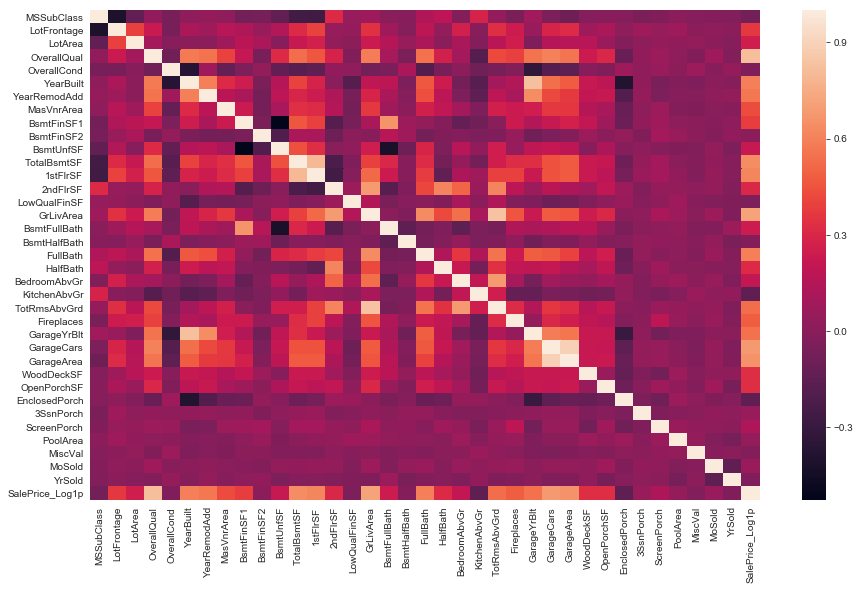

In [124]:
#correlatin matrix
corrmat = train_df.corr()

plt.subplots(figsize=(15,9))
sns.heatmap(corrmat)

# Feature Engineering

In [ ]:
# from sklearn import preprocessing
# def convert(data):
#     number = preprocessing.LabelEncoder()
#     data['Employer_Name'] = number.fit_transform(data.Employer_Name)
#     data['Source'] = number.fit_transform(data.Source)
#     data=data.fillna(-999)
#     return data

In [144]:
#use labelencoder to transfer the cat variables into nums
from sklearn import preprocessing

encode_cat_variables = ('Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 
                        'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 
                        'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 
                        'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 
                        'MSSubClass', 'MSZoning', 'MasVnrType', 'MiscFeature', 'MoSold', 'Neighborhood', 'OverallCond', 'PavedDrive', 
                        'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'YrSold')

for variable in encode_cat_variables:
    lbl = preprocessing.LabelEncoder() 
    lbl.fit(list(data[variable].values)) 
    data[variable] = lbl.transform(list(data[variable].values))

In [141]:
print(data.shape)

(2915, 79)


In [150]:
#for those numeric features, normalize them
#for those factorial features, keep type as str
encode_cat_variables = ('Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 
                        'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 
                        'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 
                        'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 
                        'MSSubClass', 'MSZoning', 'MasVnrType', 'MiscFeature', 'MoSold', 'Neighborhood', 'OverallCond', 'PavedDrive', 
                        'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'YrSold')

numerical_features = [col for col in data.columns if col not in encode_cat_variables]

# for variable in encode_cat_variables:
#     lbl = LabelEncoder() 
#     lbl.fit(list(data[variable].values)) 
#     data[variable] = lbl.transform(list(data[variable].values))

for variable in data.columns:
    if variable not in encode_cat_variables:
        data[variable] = data[variable].apply(float)
    else:
        data[variable] = data[variable].apply(str)

print(data.shape)

(2915, 110)


In [151]:
#get dummy
data = pd.get_dummies(data)
print(data.shape)

(2915, 348)


In [153]:
#create a new feature total SF
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
print("Categorical Features: %d"%len(encode_cat_variables))
print("Numerical Features: %d"%len(numerical_features))

Categorical Features: 46
Numerical Features: 70


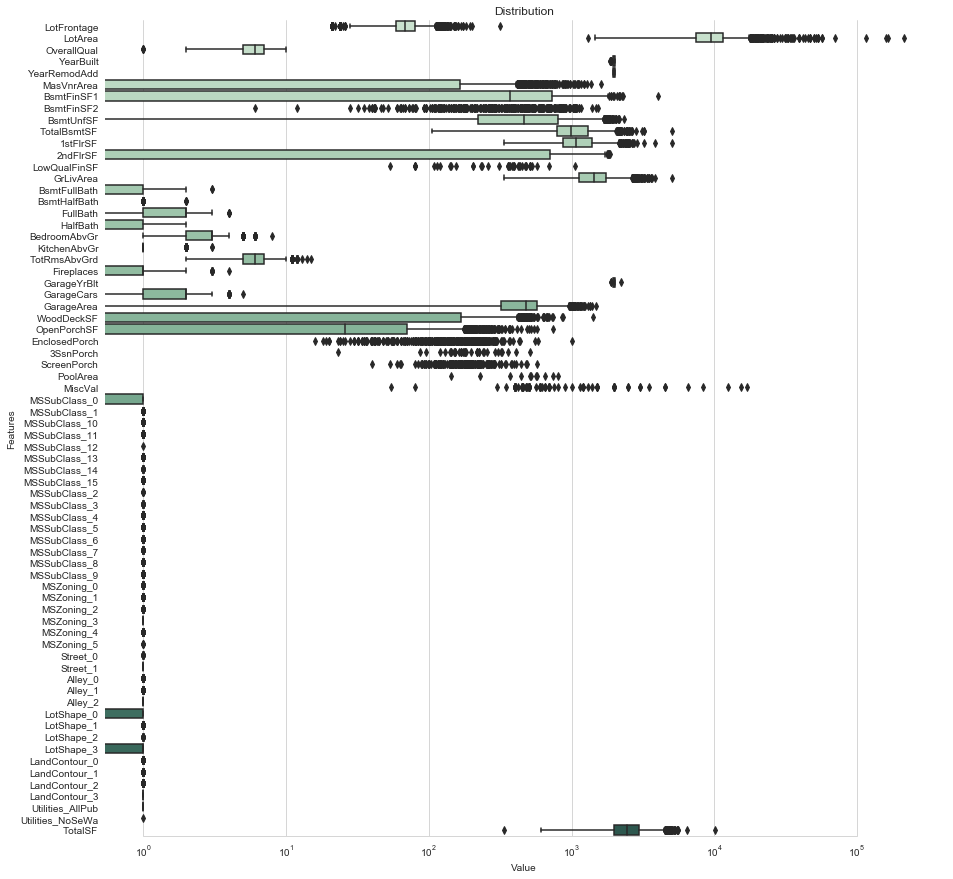

In [152]:
#Boxplot for numerical_features
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(15, 15))
ax.set_xscale("log")
ax = sns.boxplot(data=data[numerical_features] , orient="h", palette="ch:2.5,-.2,dark=.3")
ax.set(ylabel="Features")
ax.set(xlabel="Value")
ax.set(title="Distribution")
sns.despine(trim=True, left=True)

box-cox transformation

In [154]:
#calculate the skewness
skewed_features = data[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_features

MSSubClass_12       53.962953
Utilities_NoSeWa    53.962953
MSZoning_5          26.939773
MSSubClass_2        21.973516
MiscVal             21.932147
PoolArea            18.701829
Street_0            15.489377
LotShape_2          13.832516
LotArea             13.123758
MSSubClass_14       12.979848
MSSubClass_3        12.607564
LowQualFinSF        12.080315
3SsnPorch           11.368094
MSSubClass_7        11.124167
MSZoning_0          10.658736
MSZoning_2          10.446262
MSSubClass_9         7.599073
LandContour_2        6.753099
MSSubClass_15        6.693897
LotShape_1           5.948280
Alley_1              5.865091
MSSubClass_10        4.876676
LandContour_0        4.731691
MSSubClass_8         4.663215
Alley_0              4.618939
LandContour_1        4.618939
MSSubClass_13        4.451895
MSSubClass_6         4.451895
KitchenAbvGr         4.298845
MSSubClass_1         4.245150
                      ...    
WoodDeckSF           1.848285
MSSubClass_5         1.532540
1stFlrSF  

In [155]:
skewed_features = skewed_features[abs(skewed_features) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewed_features.shape[0]))

from scipy.special import boxcox1p
skewed_features_name = skewed_features.index
lam = 0.15 # 超参数
for feat in skewed_features_name:
    tranformer_feat = boxcox1p(data[feat], lam)
    data[feat] = tranformer_feat

data[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

There are 54 skewed numerical features to Box Cox transform


Utilities_NoSeWa    53.962953
MSSubClass_12       53.962953
MSZoning_5          26.939773
MSSubClass_2        21.973516
PoolArea            16.487849
Street_0            15.489377
LotShape_2          13.832516
MSSubClass_14       12.979848
MSSubClass_3        12.607564
MSSubClass_7        11.124167
MSZoning_0          10.658736
MSZoning_2          10.446262
3SsnPorch            8.918476
LowQualFinSF         8.737917
MSSubClass_9         7.599073
LandContour_2        6.753099
MSSubClass_15        6.693897
LotShape_1           5.948280
Alley_1              5.865091
MiscVal              5.592866
MSSubClass_10        4.876676
LandContour_0        4.731691
MSSubClass_8         4.663215
Alley_0              4.618939
LandContour_1        4.618939
MSSubClass_6         4.451895
MSSubClass_13        4.451895
MSZoning_1           4.245150
MSSubClass_1         4.245150
BsmtHalfBath         3.797026
                      ...    
LotShape_0           0.718051
HalfBath             0.698770
TotalBsmtS

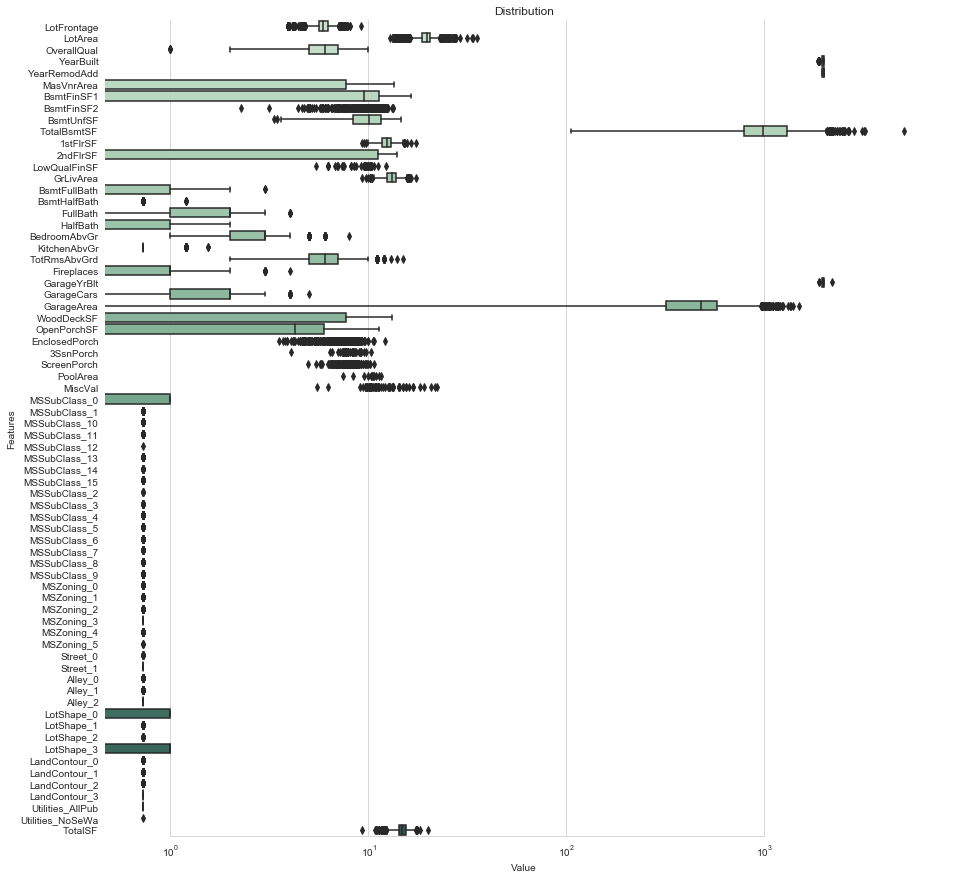

In [156]:
#Boxplot for numerical_features
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(15, 15))
ax.set_xscale("log")
ax = sns.boxplot(data=data[numerical_features] , orient="h", palette="ch:2.5,-.2,dark=.3")
ax.set(ylabel="Features")
ax.set(xlabel="Value")
ax.set(title="Distribution")
sns.despine(trim=True, left=True)

In [157]:
#divide datasets after engineering
train = data[:size_train_df]
test = data[size_train_df:]

## Model Building

In [158]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

ModuleNotFoundError: No module named 'xgboost'

validation function

In [160]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, target_variable, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [161]:
#lasso regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Users\yutin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [162]:
#kernel ridge regression
KRR = make_pipeline(RobustScaler(), KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5))
score = rmsle_cv(KRR)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Users\yutin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#elastic net regression
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))